<div style="background-color:rgba(255, 0, 0, 0.1)"> 

# Submitted by: Umer Farooq
# Program: Data Analysis Nanodegree
# Project 3: Analyzing A/B Test Results
    
</div>

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusions](#conclusions)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import display as disp
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
disp(df.head())
disp(df.info())
disp(df['group'].value_counts())
disp(df['landing_page'].value_counts())

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


None

treatment    147276
control      147202
Name: group, dtype: int64

old_page    147239
new_page    147239
Name: landing_page, dtype: int64

b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

<div style="background-color:rgba(0, 225, 0, 0.1)">

### Answer
    
There are 294478 rows in our dataset.

</div>

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

<div style="background-color:rgba(0, 225, 0, 0.1)">

### Answer
    
There are 290584 unique users in our dataset.

</div>

d. The proportion of users converted.

In [5]:
# Here we use the number of unique users to accurately identify the propotion

(df['converted']==1).sum()/df['user_id'].nunique()

0.12126269856564711

<div style="background-color:rgba(0, 225, 0, 0.1)">

### Answer
    
The propotion of converted users is 12.13%.

</div>

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
((df['group'] == 'treatment') != (df['landing_page'] == 'new_page')).sum()

3893

<div style="background-color:rgba(0, 225, 0, 0.1)">

### Answer
    
The number of times the new_page and treatment don't line up is 3893.

</div>

f. Do any of the rows have missing values?

In [7]:
Num_of_NaNs = df.isnull().sum().sum()
Num_of_NaNs

0

<div style="background-color:rgba(0, 225, 0, 0.1)">

### Answer
    
There are no missing values in any of the rows.

</div>

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = (df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page'))]).copy()
df2.shape[0]

290585

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

<div style="background-color:rgba(0, 225, 0, 0.1)">

### Comments
    
After filtering our rows to create a new data frame, we are left with 290585 users.<br>
</div>

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

<div style="background-color:rgba(0, 225, 0, 0.1)">

### Answer
    
The number of unique users is still 290584.<br>
Seems like almost all removed rows represented repeated users (except for one).
</div>

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2['user_id'].duplicated(keep = False) == True]

# We see both the duplicated user_id rows below

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

<div style="background-color:rgba(0, 225, 0, 0.1)">

### Answer
    
the user_id repeated in df2 is 773192. Group: treatment; landing_page: new_page; converted: 0.
</div>

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [12]:
# We use try except here to avoid errors in case the code is ran more than once
# We will drop the row with index = 2893
try:
    df2.drop(2893, axis = 0, inplace = True)
except:
    disp('the row was already removed, cell has ran already')
   
disp(df2.shape[0])
disp(df2[df2['user_id'].duplicated() == True].shape[0])

290584

0

<div style="background-color:rgba(0, 225, 0, 0.1)">

### Comments
    
We can see from above cell that the number of duplicated users has been reduced to zero.
</div>

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [13]:
(df2['converted']==1).mean()

0.11959708724499628

<div style="background-color:rgba(0, 225, 0, 0.1)">

### Answer
    
The probability of an individual converting, without any regard to the page they receive, is 11.96%.
</div>

b. Given that an individual was in the `control` group, what is the probability they converted?

In [14]:
df2_control = df2[df2['group']=='control']
control_conv_prop = (df2_control['converted']==1).mean()
control_conv_prop

0.1203863045004612

<div style="background-color:rgba(0, 225, 0, 0.1)">

### Answer
    
Given that an individual was in the control group, the probability that they converted is 12.04%.
</div>

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [15]:
df2_treatment = df2[df2['group']=='treatment']
treatment_conv_prop = (df2_treatment['converted']==1).mean()
treatment_conv_prop

0.11880806551510564

<div style="background-color:rgba(0, 225, 0, 0.1)">

### Answer
    
Given that an individual was in the treatment group, the probability that they converted is 11.88%.
</div>

d. What is the probability that an individual received the new page?

In [16]:
(df2['landing_page']=='new_page').mean()

0.5000619442226688

<div style="background-color:rgba(0, 225, 0, 0.1)">

### Answer
    
The probability that an individual received the new page is 50.01%.
</div>

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [17]:
percent_change = ((treatment_conv_prop - control_conv_prop)/control_conv_prop)*100
disp('The conversion rate changed by {}% due to the new page'.format(round(percent_change,2)))

'The conversion rate changed by -1.31% due to the new page'

<div style="background-color:rgba(0, 225, 0, 0.1)">

# Answer
    
**Using descriptive statistics and probability theory we observed that the convertion rate decreased
for the new page compared to the old page. We could not find evidence that the new page performs better, but neither 
does this necessarily mean that the new page caused a decrease in conversion rate. We should run a hypothesis test 
to find out if the difference we observed is statistically significant or by chance.**
    
</div>


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} - p_{old} \leq 0$$
$$H_1: p_{new} - p_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
p_new = (df2['converted']==1).mean()
p_new

0.11959708724499628

<div style="background-color:rgba(0, 225, 0, 0.1)">

### Answer
    
Since we assumed that $p_{new}$ is equal to the converted rate in ab_data.csv regardless of the page. The **convert rate** for $p_{new}$ under the null is 11.96%.
</div>

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old = (df2['converted']==1).mean()
p_old

0.11959708724499628

<div style="background-color:rgba(0, 225, 0, 0.1)">

### Answer
    
Since we assumed that $p_{old}$ is equal to the converted rate in ab_data.csv regardless of the page. The **convert rate** for $p_{old}$ under the null is also 11.96%.
</div>

c. What is $n_{new}$?

In [20]:
n_new = df2[df2['landing_page'] == 'new_page']['user_id'].count()
n_new

145310

<div style="background-color:rgba(0, 225, 0, 0.1)">

### Answer
    
The number of users that saw the new page is 145310.
</div>

d. What is $n_{old}$?

In [21]:
n_old = df2[df2['landing_page'] == 'old_page']['user_id'].count()
n_old

145274

<div style="background-color:rgba(0, 225, 0, 0.1)">

### Answer
    
The number of users that saw the old page is 145274.
</div>

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = df2['converted'].sample(n_new, replace=True)

<div style="background-color:rgba(0, 225, 0, 0.1)">

### Comments
We sample $n_{new}$ values for converted column from our earlier dataset (assuming a conversion rate of $p_{new}$ = $p_{old}$).
    
</div>

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = df2['converted'].sample(n_old, replace=True)

<div style="background-color:rgba(0, 225, 0, 0.1)">

### Comments
We sample $n_{old}$ values for converted column from our earlier dataset (assuming a conversion rate of $p_{old}$ = $p_{new}$).
    
</div>

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
p_new = (new_page_converted==1).mean()
p_old = (old_page_converted==1).mean()
p_diff = p_new - p_old
disp('The difference in conversion rates is: ',p_diff)

'The difference in conversion rates is: '

0.0005073077805668874

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
p_diffs = []
for i in range(10000):
    new_page_converted = df2['converted'].sample(n_new, replace=True)
    old_page_converted = df2['converted'].sample(n_old, replace=True)
    p_new = (new_page_converted==1).mean()
    p_old = (old_page_converted==1).mean()
    p_diffs.append(p_new - p_old)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

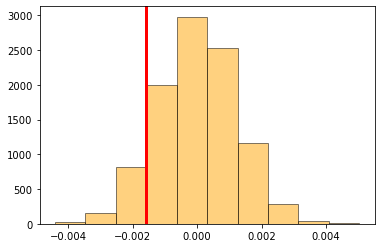

In [26]:
plt.hist(p_diffs, edgecolor='black', linewidth=1, color = 'orange', alpha = 0.5)

p_diff_data = treatment_conv_prop - control_conv_prop
plt.axvline(x = p_diff_data, color = 'red',linewidth=3)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
p_diffs = np.array(p_diffs)
p_val = (p_diffs > p_diff_data).mean()
p_val

0.9003

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<div style="background-color:rgba(0, 225, 0, 0.1)">

# Answer
    
**What we computed here is called the p-value. Since this value is much larger than our Type I error rate of 0.05,
we have evidence that our observed difference was not statistically significant. We fail to reject the null hypothesis and conclude that the new page performs worse than the old page.**
    
</div>




l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

convert_old = df2[df2['landing_page']=='old_page'].copy()
convert_new = df2[df2['landing_page']=='new_page'].copy()
n_old = convert_old.shape[0]
n_new = convert_new.shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
from statsmodels.stats.proportion import proportions_ztest
counts = np.array([(convert_new['converted']==1).sum(), (convert_old['converted']==1).sum()])
nobs = np.array([convert_new.shape[0], convert_old.shape[0]])
z_score, pval = proportions_ztest(counts, nobs, alternative = 'larger')
disp('The z-score from the test',z_score)
disp('difference computed from our simulation in terms of sampling distribution standard deviation (equivalent of z-score)', p_diff_data/np.std(p_diffs))
disp('p-value from the test',pval)
disp('p-value from our simulation',p_val)

'The z-score from the test'

-1.3109241984234394

'difference computed from our simulation in terms of sampling distribution standard deviation (equivalent of z-score)'

-1.2983419002401642

'p-value from the test'

0.9050583127590245

'p-value from our simulation'

0.9003

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<div style="background-color:rgba(0, 225, 0, 0.1)">

# Answer
    
**The z-score of -1.31 from the test means that the difference $p_{new}$ - $p_{old}$ from our data is only 1.31 times the standard deviation (of null distribution) away from the null value (of zero). this is consistent with our simulation.**<br><br>
**The p-value from z-test also agrees with our simulation, and is still much larger than 0.05 as expected. So our results from bootstrapping and the z-test both suggest that we fail to reject the null hypothesis. Thus we find no evidence that the new page performs better.**
    
</div>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<div style="background-color:rgba(0, 225, 0, 0.1)">

### Answer
    
**A logistic regression should be perfromed since our response variable has binary values.**
    
</div>



b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [30]:
df2['intercept'] = 1
df2[['con_page','ab_page']] = pd.get_dummies(df2['group'])
df2.drop('con_page', axis = 1, inplace=True)
df2.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [31]:
logistic_model = sm.Logit (df2['converted'], df2[['intercept', 'ab_page']])
result_log = logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [32]:
result_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Feb 2021   Pseudo R-squ.:               8.077e-06
Time:                        01:38:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

<div style="background-color:rgba(0, 225, 0, 0.1)">

### Answer
    
**The p-value associated with ab_page in our logistic regression model is 0.19. It differs from our value because this is a two sided z-test meaning the null hypothesis has an equal sign in it. The regression model used considers the following null and alternative hypotheses:**<br>
    
$$H_0: p_{new} - p_{old} = 0$$
$$H_1: p_{new} - p_{old} \neq 0$$
    
</div>


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<div style="background-color:rgba(0, 225, 0, 0.1)">

### Answer
    
**It is a good idea to consider other variables because they might help us capture more of the variation in the reponse variable and help make better predictions. At the same time adding more variables will cause an increase in the variance of the estimated coefficient values.There seems to be a trade-off. Also, issues like multicollinearity may result in counter-intuitive coefficients. The number and type of explanatory variables should be chosen carefully.**
    
</div>


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [33]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
disp(df_new['country'].value_counts())
disp(df_new.head())

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [34]:
# first we create the intercept and dummy variable columns

df_new['intercept'] = 1
df_new[['CA','UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.drop('US', axis = 1, inplace=True)
disp(df_new.head())

# We will use US as the baseline
logistic_model = sm.Logit (df_new['converted'], df_new[['intercept', 'ab_page','CA','UK']])
result_log = logistic_model.fit()
result_log.summary()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 09 Feb 2021   Pseudo R-squ.:               2.323e-05
Time:                        01:38:31   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

<div style="background-color:rgba(0, 225, 0, 0.1)">

### Answer
    
**By looking at the coefficients, we can observe that if a user is from UK, it is exp(0.0099) = 1.01 times more likely that they will convert compared to if they were from the US. if a user is from CA, it is exp(0.0408) = 1.04 times LESS likely that they will convert compared to if they were from the US.**<br>

**Looking at the p-values none of these differences are statistically significant, but even if they were, the difference in probability observed is not very practically significant either.**<br>
    
    
</div>


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [35]:
# Creating interaction columns (pageCA) and (pageUK)
df_new['pageCA'] = df_new['ab_page'] * df_new['CA']
df_new['pageUK'] = df_new['ab_page'] * df_new['UK']
disp(df_new.head())

# We will use US as the baseline
logistic_model = sm.Logit (df_new['converted'], df_new[['intercept', 'ab_page','CA','UK','pageCA','pageUK']])
result_log = logistic_model.fit()
result_log.summary()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,pageCA,pageUK
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1


Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 09 Feb 2021   Pseudo R-squ.:               3.482e-05
Time:                        01:38:33   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
pageCA        -0.0469      0.054     -0.872      0.383      -0.152       0.059
pageUK         0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

In [40]:
df_new['timestamp'] = pd.to_datetime(df_new['timestamp'])
(df_new['timestamp'].max() - df_new['timestamp'].min()).days

21

<div style="background-color:rgba(0, 225, 0, 0.1)">

**Looking at the coefficients, it can be observed that the interaction terms have a bigger effect on the response variables compared to all the lower order terms (even though all these terms are statistically insignificant due to high p-values).**<br>
    
**If we look at the confidence intervals, we can observe that the ab_page confidence interval widened as we kept adding more variables to our regression. Similarly, the confidence intervals for the country dummy variables also got wider when we added the interaction columns. This shows that adding more variables increases the variance of our estimated coefficients.**<br>
    
**To conclude, if we combine all our results from probability,  hypothesis testing and regression, we could not find evidence using any of the methods that our new page performs better than the old page. Since the experiment was only run for 21 days, may be more data can be gathered to ascertain our conclusions further.**<br>
</div>


<div style="background-color:rgba(0, 225, 0, 0.1)">

## References

stackoverflow: https://stackoverflow.com/

pandas documentation: https://pandas.pydata.org/docs/
    
numpy documentation: https://numpy.org/doc/
    
statmodels documentation: https://www.statsmodels.org/stable/index.html

</div>